In [124]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
DATAPATH = "E:/Downloads/PHYS363-STP_Data/"
path = lambda x: DATAPATH + x + ".txt"


In [125]:
# Load data
mpause_pass = pd.read_csv(path("magnetopause_pass"), sep=r"\s+")
solarwind_ace = pd.read_csv(path("ACE_SW_IMF_April_2001"), sep=r"\s+")
b_ground = pd.read_csv(path("B_ground_April_2001"), sep=r"\s+")
polar_lat = pd.read_csv(path("Polar_Cap_Latitude-2001-day71"), sep=r"\s+")
stp = pd.read_csv(path("STP-April-2001"), sep=r"\s+")
stp_red = pd.read_csv(path("STP-April-2001-reduced"), sep=r"\s+")
solarwind_vp = pd.read_csv(path("SW_Vp-2001-day71"), sep=r"\s+")
vpc = pd.read_csv(path("Vpc-2001-day71"), sep=r"\s+")
# print headers
cols =[print(df.columns) for df in [mpause_pass, solarwind_ace, b_ground, polar_lat, stp, stp_red, solarwind_vp, vpc]]

texlabels = {
    "mpause_pass": {
        "Dist_(Re)": r"Radial Distance $(R_\mathrm{E})$",
        "Plasma_V_(km/s)": r"Plasma Velocity $(\mathrm{km/s})$",
        "Plasma_N_(/cm^3)": r"Plasma Density $(\mathrm{cm^{-3}})$",
        "Mag_Field_(nT)": r"Magnetic Field $(\mathrm{nT})$"
    },
    "solarwind_ace": {
        "Year": r"Year",
        "Day-no": r"Day Number",
        "N-sw": r"Solar Wind Density $(\mathrm{cm^{-3}})$",
        "V-sw": r"Solar Wind Velocity $(\mathrm{km/s})$",
        "T-sw": r"Solar Wind Temperature $(\mathrm{K})$",
        "By": r"IMF $B_y$ $(\mathrm{nT})$",
        "Bz": r"IMF $B_z$ $(\mathrm{nT})$"
    },
    "b_ground": {
        "dayno": r"Day Number",
        "Ground_B_Field": r"Ground Magnetic Field $(\mathrm{nT})$",
        "Ground_B_Field(uT)": r"Ground Magnetic Field $(\mathrm{\mu T})$"
    },
    "polar_lat": {
        "Day-no": r"Day Number",
        "Latitude": r"Latitude $(\mathrm{degrees})$"
    },
    "stp": {
        "Day-no": r"Day Number",
        "Vpc": r"$V_{pc}$ $(\mathrm{kV})$",
        "Bx": r"IMF $B_x$ $(\mathrm{nT})$",
        "By": r"IMF $B_y$ $(\mathrm{nT})$",
        "Bz": r"IMF $B_z$ $(\mathrm{nT})$",
        "Vsw": r"Solar Wind Velocity $(\mathrm{km/s})$",
        "Nsw": r"Solar Wind Density $(\mathrm{cm^{-3}})$"
    },
    "stp_red": {
        "Day_no": r"Day Number",
        "Vpc": r"$V_{pc}$ $(\mathrm{kV})$",
        "Bx": r"IMF $B_x$ $(\mathrm{nT})$",
        "By": r"IMF $B_y$ $(\mathrm{nT})$",
        "Bz": r"IMF $B_z$ $(\mathrm{nT})$",
        "Vsw": r"Solar Wind Velocity $(\mathrm{km/s})$",
        "Nsw": r"Solar Wind Density $(\mathrm{cm^{-3}})$"
    },
    "solarwind_vp": {
        "Day-no": r"Day Number",
        "SW_Vp": r"Solar Wind Potential $(\mathrm{kV})$"
    },
    "vpc": {
        "Day-no": r"Day Number",
        "Vpc(kV)": r"$V_{pc}$ $(\mathrm{kV})$",
        "IMF-By(nT)": r"IMF $B_y$ $(\mathrm{nT})$",
        "IMF-Bz(nT)": r"IMF $B_z$ $(\mathrm{nT})$"
    }
}



Index(['Dist_(Re)', 'Plasma_V_(km/s)', 'Plasma_N_(/cm^3)', 'Mag_Field_(nT)'], dtype='object')
Index(['Year', 'Day-no', 'N-sw', 'V-sw', 'T-sw', 'By', 'Bz'], dtype='object')
Index(['dayno', 'Ground_B_Field'], dtype='object')
Index(['Day-no', 'Latitude'], dtype='object')
Index(['Day-no', 'Vpc', 'Bx', 'By', 'Bz', 'Vsw', 'Nsw'], dtype='object')
Index(['Day_no', 'Vpc', 'Bx', 'By', 'Bz', 'Vsw', 'Nsw'], dtype='object')
Index(['Day-no', 'SW_Vp'], dtype='object')
Index(['Day-no', 'Vpc(kV)', 'IMF-By(nT)', 'IMF-Bz(nT)'], dtype='object')


Text(0.5, 1.0, 'Mag. Field Strength and Proton Density vs. distance from Earth\n')

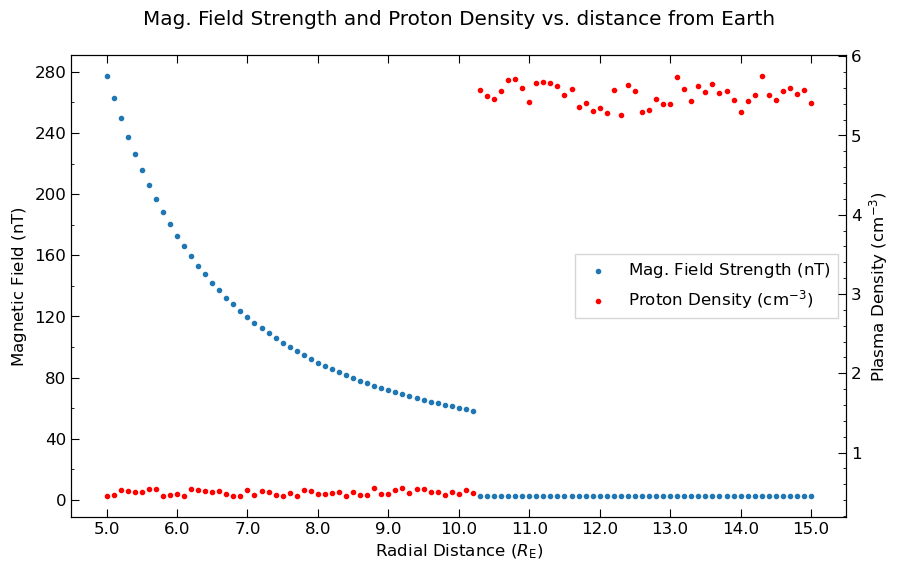

In [126]:

#plt.rc('text', usetex=True)
#plt.rc('font', family='serif', serif="")
plt.rc("font", size=12)
plt.rc("figure", figsize=(10, 6), titlesize=30, titleweight="bold")
plt.rc("xtick", top=True, bottom=True, direction="in")
plt.rc("ytick", right=True, left=True, direction="in")
plt.rc("xtick.minor", visible=True)
plt.rc("ytick.minor", visible=True)
plt.rc("xtick.major", size=6)
plt.rc("ytick.major", size=6)
plt.rc("legend", frameon=True, fontsize=12, loc="best", fancybox=False)
plt.rc("scatter", marker = ".")

fig = plt.figure()
ax = fig.add_subplot(111)
sec_ax = plt.twinx()
magfL= ax.plot(mpause_pass["Dist_(Re)"],mpause_pass["Mag_Field_(nT)"],linewidth=0)
plasmaN = sec_ax.plot(mpause_pass["Dist_(Re)"],mpause_pass["Plasma_N_(/cm^3)"],c='red' ,linewidth=0)
magf= ax.scatter(mpause_pass["Dist_(Re)"],mpause_pass["Mag_Field_(nT)"], label= "Mag. Field Strength $\mathrm{(nT)}$")
plasmaN = sec_ax.scatter(mpause_pass["Dist_(Re)"],mpause_pass["Plasma_N_(/cm^3)"],label= "Proton Density $\mathrm{(cm^{-3})}$",c='red')
ax.set_xlabel(texlabels["mpause_pass"]["Dist_(Re)"])
ax.set_ylabel(texlabels["mpause_pass"]["Mag_Field_(nT)"])
sec_ax.set_ylabel(texlabels["mpause_pass"]["Plasma_N_(/cm^3)"])
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.linspace(5, 15, 11, endpoint=True))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%0.1f'))
ax.yaxis.set_ticks(np.linspace(0, 280, 8, endpoint=True))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(20))
ax.yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%0.f'))

ax.legend([ax.get_legend_handles_labels()[0][0],sec_ax.get_legend_handles_labels()[0][0]],[ax.get_legend_handles_labels()[1][0],sec_ax.get_legend_handles_labels()[1][0]], loc='center right')
plt.title("Mag. Field Strength and Proton Density vs. distance from Earth\n") 

#plt.show()

In [127]:
from scipy.constants import e, m_p, epsilon_0, mu_0
def Pdyn(numdensity, vel):
    return m_p * numdensity * vel**2
def Pmag(B):
    return B**2 / (2 * mu_0)

In [128]:
mpause_pass["Plasma_N_(/m^3)"] = mpause_pass["Plasma_N_(/cm^3)"] * 1e6
mpause_pass["Plasma_V_(m/s)"]= mpause_pass["Plasma_V_(km/s)"] * 1e3
mpause_pass["Pdyn_(nPa)"] = Pdyn(mpause_pass["Plasma_N_(/m^3)"] , mpause_pass["Plasma_V_(m/s)"]) * (1e9)
mpause_pass["Pmag_(nPa)"] = Pmag(mpause_pass["Mag_Field_(nT)"]) * (1e-9)




Text(0.5, 1.0, 'Title\n')

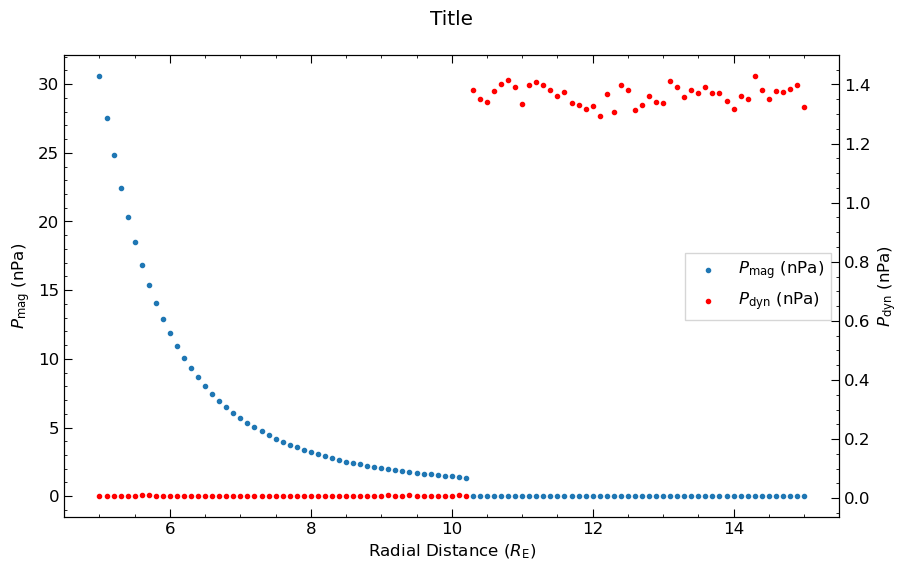

In [129]:
fig = plt.figure()
ax = fig.add_subplot(111)
sec_ax = plt.twinx()
magfL= ax.plot(mpause_pass["Dist_(Re)"],mpause_pass["Pmag_(nPa)"],linewidth=0)
plasmaN = sec_ax.plot(mpause_pass["Dist_(Re)"],mpause_pass["Pdyn_(nPa)"],c='red' ,linewidth=0)
magf= ax.scatter(mpause_pass["Dist_(Re)"],mpause_pass["Pmag_(nPa)"], label= "$P_\mathrm{mag}$ $\mathrm{(nPa)}$")
plasmaN = sec_ax.scatter(mpause_pass["Dist_(Re)"],mpause_pass["Pdyn_(nPa)"],label= "$P_\mathrm{dyn}$ $\mathrm{(nPa)}$",c='red')
ax.set_ylabel(r"$P_\mathrm{mag}$ $\mathrm{(nPa)}$")
ax.set_xlabel(r"Radial Distance $(R_\mathrm{E})$")
sec_ax.set_ylabel(r"$P_\mathrm{dyn}$ $\mathrm{(nPa)}$")
start, end = ax.get_xlim()
#ax.xaxis.set_ticks(np.linspace(5, 15, 11, endpoint=True))
#ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(1))
#ax.xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%0.1f'))
#ax.yaxis.set_ticks(np.linspace(0, 280, 8, endpoint=True))
#ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(20))
#ax.yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%0.f'))

ax.legend([ax.get_legend_handles_labels()[0][0],sec_ax.get_legend_handles_labels()[0][0]],[ax.get_legend_handles_labels()[1][0],sec_ax.get_legend_handles_labels()[1][0]], loc='center right')
plt.title("Title\n") 

#plt.show()

30.7134 31.0566


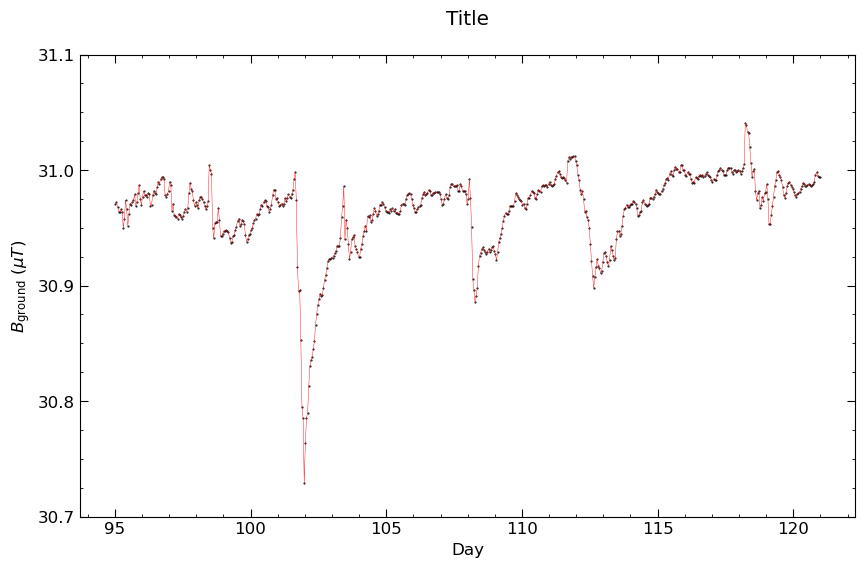

In [130]:
fig = plt.figure()
ax = fig.add_subplot(111)
#sec_ax = plt.twinx()
b_ground["Ground_B_Field(uT)"] = b_ground["Ground_B_Field"] * 1e-3
bmagL= ax.plot(b_ground["dayno"],b_ground["Ground_B_Field(uT)"],linewidth=0.3, color="red")
#plasmaN = sec_ax.plot(mpause_pass["Dist_(Re)"],mpause_pass["Pdyn_(nPa)"],c='red' ,linewidth=0)
bmag= ax.scatter(b_ground["dayno"],b_ground["Ground_B_Field(uT)"], label= "", s=1,c="black")
#plasmaN = sec_ax.scatter(mpause_pass["Dist_(Re)"],mpause_pass["Pdyn_(nPa)"],label= "$P_\mathrm{dyn}$ $\mathrm{(nPa)}$",c='red')
ax.set_ylabel(r"$B_\mathrm{ground}\ (\mu T)$")
ax.set_xlabel(r"Day")
#sec_ax.set_ylabel(r"$P_\mathrm{dyn}$ $\mathrm{(nPa)}$")
start, end = ax.get_ylim()
print(start, end)
#ax.xaxis.set_ticks(np.linspace(5, 15, 11, endpoint=True))
#ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(1))
#ax.xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%0.1f'))
ax.yaxis.set_ticks(np.arange(30.7, 31.1, 0.1))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.025))
ax.yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%0.1f'))
#ax.legend()
#ax.legend([ax.get_legend_handles_labels()[0][0],sec_ax.get_legend_handles_labels()[0][0]],[ax.get_legend_handles_labels()[1][0],sec_ax.get_legend_handles_labels()[1][0]], loc='center right')
plt.title("Title\n") 

plt.show()

In [1]:
# day no is hourly average
DEC_HR = 1/24
def ndiff(data, x):
    copy = pd.DataFrame(data)
    for n in range(0,x):
        copy = copy.diff()
    return copy
def min_max(dataseries, rel=False):
    if not rel:
        return (dataseries.min(), dataseries.max())
    else:
        return (0,(dataseries.max()-dataseries.min())) 

b_ground["D_ST(nT)"] = b_ground["Ground_B_Field"]-31000 #-> Base Dataset 
dayno_extrema, dayno_rextrema = [min_max(b_ground["dayno"]), min_max(b_ground["dayno"], rel=True)] # find extrema in abs and relative systems
b_ground["Rel_dayno"] = b_ground["dayno"]- dayno_extrema[0] #-> zero point dataset


fig = plt.figure()
ax = fig.add_subplot(111)
sec_ax = plt.twinx()

b_ground["D_ST_RollingAv(nT)"]= b_ground["D_ST(nT)"].rolling(window=3, closed="both", center=True).mean() # rolling average
b_ground["D_ST_Diff(nT)"] = ndiff(b_ground["D_ST(nT)"], 2) # nth order differential of D_sT (find largest changes)



# gets the largest and -ve largest values of change, gets neccesary coordinates to plot.
large_mags = pd.concat([
    b_ground["D_ST_Diff(nT)"].nlargest(15).reset_index().rename(columns={"index": "Index", "D_ST_Diff(nT)": "Value"}),
    b_ground["D_ST_Diff(nT)"].nsmallest(15).reset_index().rename(columns={"index": "Index", "D_ST_Diff(nT)": "Value"})
])
large_mags = large_mags.sort_values(by="Index", ascending=True).reset_index(drop=True)
large_mags["Rel_dayno"] = large_mags["Index"].apply(lambda x: b_ground.loc[x, "Rel_dayno"])
large_mags["D_ST(nT)"] = large_mags["Index"].apply(lambda x: b_ground.loc[x, "D_ST(nT)"])


print(large_mags) # prints large change vals as described
scatter3L = sec_ax.plot(b_ground["Rel_dayno"],b_ground["D_ST_Diff(nT)"],c='green' ,linewidth=0.3) # change data plot
scatter1= ax.scatter(b_ground["Rel_dayno"],b_ground["D_ST(nT)"], label= "", s=1,c="black") # relative, base data points
scatter1L= ax.plot(b_ground["Rel_dayno"],b_ground["D_ST(nT)"],linewidth=0.5, color="red") # relative, base plot

scatter2 = ax.scatter(large_mags["Rel_dayno"], large_mags["D_ST(nT)"],c='red') # largest change data points

# set axes labels
ax.set_ylabel(r"$D_\mathit{ST}\ (n T)$")
ax.set_xlabel(r"Day")
#sec_ax.set_ylabel(r"$P_\mathrm{dyn}$ $\mathrm{(nPa)}$")

# draw zero line
ax.hlines(0,*dayno_rextrema, "black", linewidth=0.5, zorder=-1)


#set ticks and legend
ax.set_xlim(dayno_rextrema)
start, end = ax.get_ylim()
print(start, end)
#ax.xaxis.set_ticks(np.linspace(5, 15, 11, endpoint=True))
#ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(1))
#ax.xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%0.1f'))
#ax.yaxis.set_ticks(np.linspace(start,end,7))#np.arange(30.7, 31.1, 0.1))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(25))
ax.yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%0.1f'))
#ax.legend()
#ax.legend([ax.get_legend_handles_labels()[0][0],sec_ax.get_legend_handles_labels()[0][0]],[ax.get_legend_handles_labels()[1][0],sec_ax.get_legend_handles_labels()[1][0]], loc='center right')
plt.title("Title\n") 

plt.show()

NameError: name 'b_ground' is not defined